## 와인 종류(레드/화이트) 분류를 위한 결정 트리 모델

### 1. 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 URL
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# 각 데이터셋 불러오기 (구분자 ;)
red_wine = pd.read_csv(red_wine_url, sep=';')
white_wine = pd.read_csv(white_wine_url, sep=';')

### 2. 데이터 준비
- 레드 와인과 화이트 와인 데이터를 병합합니다.
- 이진 분류를 위해 `type` 열을 추가합니다. (레드=0, 화이트=1)

In [3]:
# 각 데이터에 type 열 추가
red_wine['type'] = 0  # 레드 와인
white_wine['type'] = 1 # 화이트 와인

# 데이터 병합
wine = pd.concat([red_wine, white_wine])

# 피처(X)와 타겟(y) 분리
X = wine.drop('type', axis=1)
y = wine['type']

# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 3. 결정 트리 모델 학습
- `max_depth`를 3으로 설정하여 트리의 복잡도를 제한하고 시각화를 용이하게 합니다.

In [4]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### 4. 결정 트리 시각화

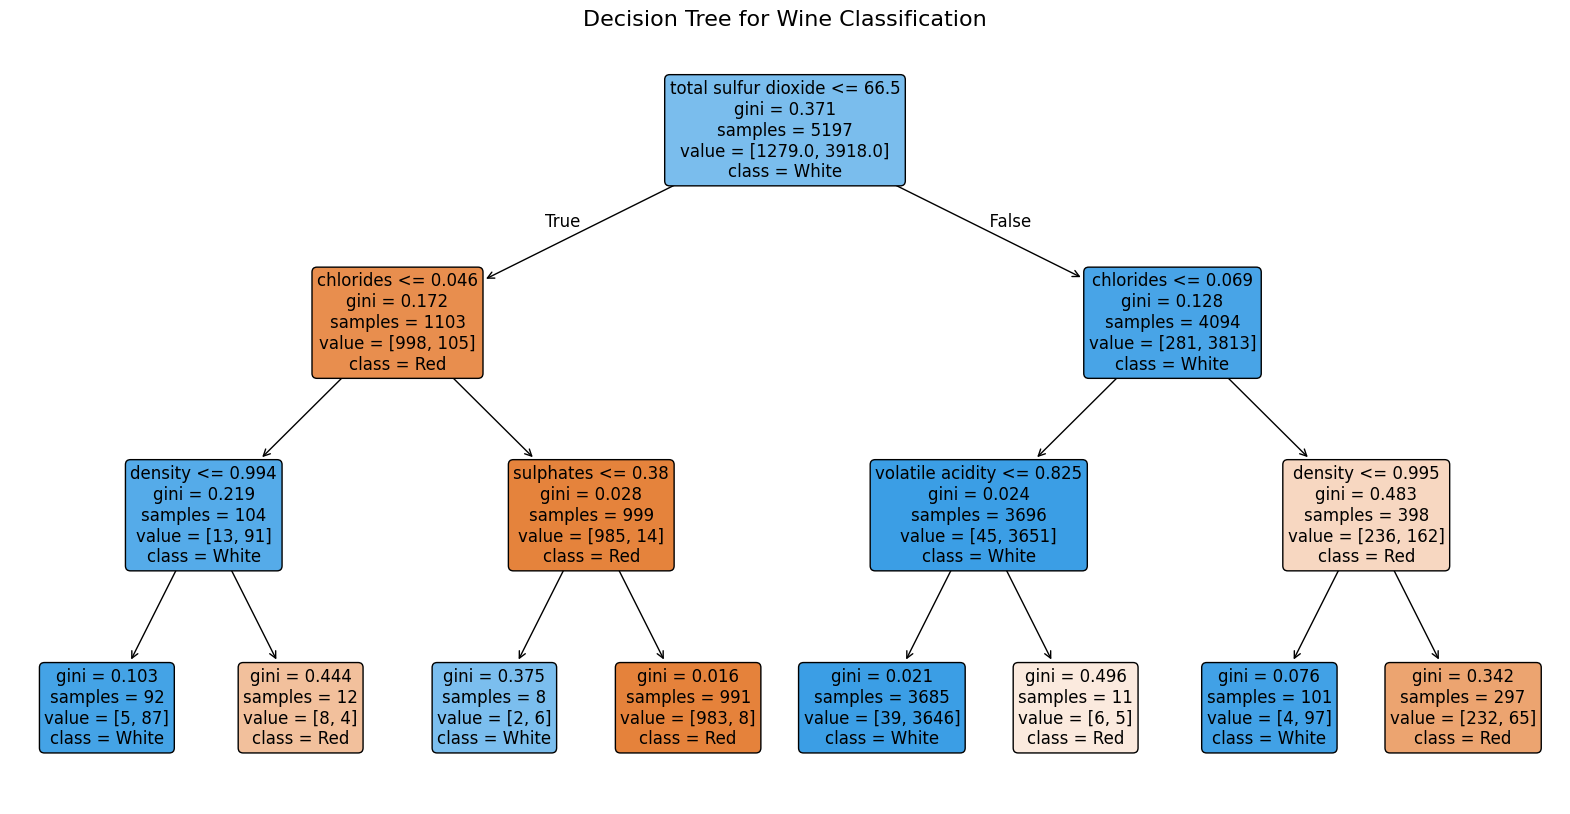

In [5]:
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=X.columns, 
          class_names=['Red', 'White'], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree for Wine Classification", fontsize=16)
plt.show()

### 5. 와인 종류를 구분하는 가장 중요한 상위 분기 규칙
시각화된 결정 트리의 최상단(루트 노드)부터 내려오면서 와인 종류를 구분하는 가장 중요한 규칙들을 확인할 수 있습니다.

1.  **첫 번째 분기 규칙 (가장 중요한 규칙): `total sulfur dioxide <= 66.5`**
    - 트리의 가장 최상단인 루트 노드에서 사용된 규칙입니다. 이산화황 총량(`total sulfur dioxide`)이 66.5 이하인지 여부가 레드와 화이트 와인을 구분하는 가장 중요한 단일 기준으로 사용되었습니다.
    - **True (왼쪽)**: 이산화황 총량이 66.5보다 작거나 같으면 **레드 와인**으로 분류될 가능성이 높은 그룹으로 이동합니다. 이 그룹에는 1103개의 샘플이 있으며, 그중 998개가 레드 와인입니다. (value = [998, 105])
    - **False (오른쪽)**: 이산화황 총량이 66.5보다 크면 **화이트 와인**으로 분류될 가능성이 매우 높은 그룹으로 이동합니다. 이 그룹에는 4094개의 샘플이 있으며, 그중 3813개가 화이트 와인입니다. (value = [281, 3813])

2.  **두 번째 수준의 분기 규칙:**
    - **`total sulfur dioxide <= 66.5` 그룹 (주로 레드 와인):** 이 그룹은 `chlorides <= 0.046` 규칙으로 추가 분기됩니다. 염화물(`chlorides`) 수치가 0.046을 초과하는 경우, 하위 노드(sulphates <= 0.38)를 거쳐 레드 와인으로 예측되는 경향이 강해집니다.
    - **`total sulfur dioxide > 66.5` 그룹 (주로 화이트 와인):** 이 그룹은 `chlorides <= 0.069` 규칙으로 추가 분기됩니다. 염화물 수치가 0.069 이하이면 거의 순수하게 **화이트 와인**으로 예측됩니다.

**핵심 인사이트:**
- 이산화황 총량(total sulfur dioxide)이 와인 종류를 구분하는 가장 강력한 단일 지표입니다.
- 레드 와인은 일반적으로 이산화황 총량이 낮고(≤66.5), 화이트 와인은 높습니다(>66.5).
- 각 그룹 내에서는 **염화물(chlorides)** 수치가 와인 종류를 더 세부적으로 구분하는 중요한 역할을 합니다.